In [1]:
import numpy as np
from scipy.optimize import root_scalar,fsolve
from scipy.integrate import quad

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsmath}',
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica']
})

In [2]:
# Problem 1: RNGs

In [3]:
rng = np.random.default_rng(seed=12345)

N = 100000
sample = np.array([rng.random() for i in range(N)])

one sequence uniformity

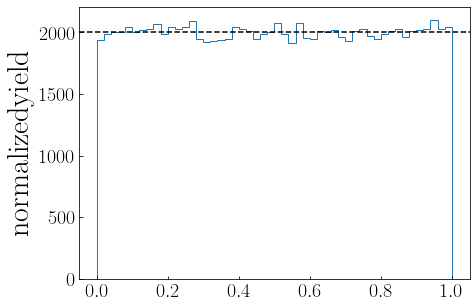

In [4]:
nrows,ncols = 1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

bins = 50
counts,edges = np.histogram(sample,bins=bins,density=False)
ax.stairs(counts,edges)

# ax.set_xlabel(r'$\rm bin$',size=30)
ax.set_ylabel(r'$\rm normalized yield$',size=30)
ax.tick_params(which='major',axis='both',labelsize=20,direction='in')
ax.axhline(N/bins,color='k',ls='--')


plt.show()

parking lot

In [5]:
N = 1000
sample1 = np.array([rng.random() for i in range(N)])
sample2 = np.array([rng.random() for i in range(N)])

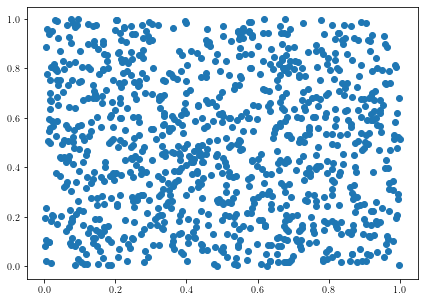

In [6]:
nrows,ncols = 1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

ax.scatter(sample1,sample2)

plt.show()

moments and correlation

In [7]:
def get_mom(sample,n=1):
    return np.sum(sample**n)/sample.shape[0]

In [8]:
def get_nn_corr(sample,k=1):
    return np.sum(sample[:-k]*sample[k:])/sample.shape[0]

In [9]:
N = np.arange(10,10000,100)

n = 5
k = 5
mom  = []
corr = []
for _ in N:
    temp = np.array([rng.random() for i in range(_)])
    mom.append(get_mom(temp,n=n))
    corr.append(get_nn_corr(temp,k=k))

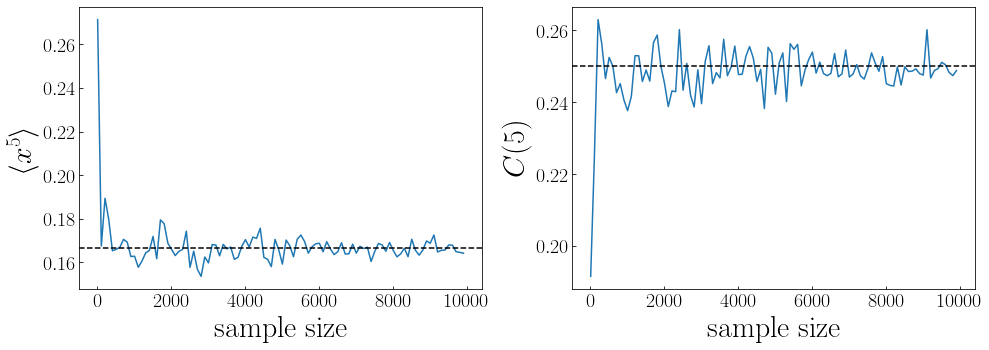

In [10]:
nrows,ncols=1,2
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

ax[0].plot(N,mom)
ax[0].axhline(1/(k+1),color='k',ls='--')

ax[1].plot(N,corr)
ax[1].axhline(1/4,color='k',ls='--')

for i in range(2):
    ax[i].set_xlabel(r'$\rm sample~size$',size=30)
    ax[i].tick_params(axis='both',which='major',direction='in',labelsize=20)
ax[0].set_ylabel(r'$\langle x^{%d} \rangle$'%n,size=30)
ax[1].set_ylabel(r'$C(%d)$'%k,size=30)

fig.tight_layout()
plt.show()

# Problem 2: non-uniform sampling

In [11]:
def transform_sample(N,F_inv=None,F=None,f=None):
    '''
        generate N samples from desired probability density
        -- ordering of optional parameters by priority/preference
           i.e. if F_inv (func) known analytically pass to this (best method)
                else if F known analytically pass to this (not too bad in most cases)
                else if only PDF known pass to f (not very good in general)
    '''
    u = np.random.uniform(size=N)
    if F_inv is not None:
        sample = F_inv(u)
    elif F is not None:
        temp = lambda t: F(t) - u
        sample = fsolve(temp,np.random.uniform(size=u.shape[0]))
    elif f is not None:
        F_   = lambda t: np.array([quad(f,-np.inf,_)[0] for _ in t])
        temp = lambda t: F_(t) - u
        sample = fsolve(temp,np.random.uniform(size=u.shape[0]))
        
    return sample

In [31]:
def rejection_sample(N,f,x_ext,y_ext,verb=0):
    x  = np.random.uniform(*x_ext,size=N)
    y  = np.random.uniform(*y_ext,size=N)
    f_ = f(x)
    diff = f_ - y
    sample = x[diff>=0]
    if verb:
        print(f'rejection rate: {1 - sample.shape[0]/N}')
    return sample

In [98]:
def metropolis_sample(N,f,x0=0,delta=1,bounds=[-np.inf,np.inf],verb=0):
    sample = [x0]
    f_     = [f(x0)]
    
    count = 0
    while len(sample) <= N:
        x1 = sample[-1] + delta*(2*np.random.uniform() - 1)
        
        if x1 < bounds[0] or x1 > bounds[1]:
            continue
            
        f1 = f(x1)
        r  = f1/f_[-1]
        u  = np.random.uniform()
        if u <= r:
            sample.append(x1)
            f_.append(f1)
        
        count += 1
    
    sample = np.array(sample)
    if verb:
        print(f'rejection rate: {(count - sample.shape[0])/N}')
    
    return sample

In [146]:
# sample = transform_sample(10000,F_inv=lambda t: t)
# sample = rejection_sample(100000,lambda t: np.exp(-t),[0,3],[0,1],verb=1)
sample = metropolis_sample(100000,lambda t: np.exp(-t**2/2),x0=0,delta=1,verb=1)

rejection rate: 0.24259


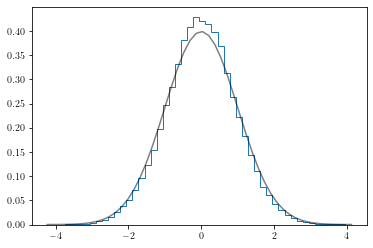

In [147]:
counts,edges = np.histogram(sample,bins=50,density=True)
plt.stairs(counts,edges)

x = np.linspace(edges[0],edges[-1])
plt.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi),color='k',alpha=0.5)
plt.show()